# Challenge Questions - Seaborn

# Instructions:
• Please ensure you don't overwrite any existing cells. Add new cells below by pressing ALT+ENTER

• Attempt all of the questions

• You are encouraged to look online for help should you need it

## Run the data preparation steps below.
### We will be left with the following DataFrame:
### players_21
* **'short_name'**: The players name
* **'overall'**: This is the players overall ability level from 0-99
* **'pace'**: Indicates how fast the player is
* **'dribbling'**: Indicates how good the player is at retaining the ball while in possession and moving with the ball
* **'passing'**: This is how good the player is at passing the ball to teammates
* **'preferred_foot'**: Indicates if the player is right or left footed
* **'league_name'**: This is the league that the player competes in

In [8]:
## Importing pandas, numpy, matplotlib.pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
players_21 = pd.read_csv('players_21.csv')

In [10]:
pd.set_option('display.max_columns',False)

In [11]:
players_21.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,...,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,...,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3


In [12]:
players_21 = players_21[['short_name','overall','pace','dribbling','passing','preferred_foot', 'league_name']]

In [13]:
players_21.head(2)

,short_name,overall,pace,dribbling,passing,preferred_foot,league_name
0,L. Messi,93,85.0,95.0,91.0,Left,Spain Primera Division
1,Cristiano Ronaldo,92,89.0,89.0,81.0,Right,Italian Serie A


# 

# Challenge Exercises:

## Create a scatter plot
* Give it a figuresize of (10,10)
* 'overall' on the y-axis, and 'passing' on the x-axis
* Title the chart 'Overall vs Passing', fontsize =30
* Give the x and y labels appropriate titles, fontsize 20
* Give the xticks and yticks a fontsize of 12
* Remove the top and right spine

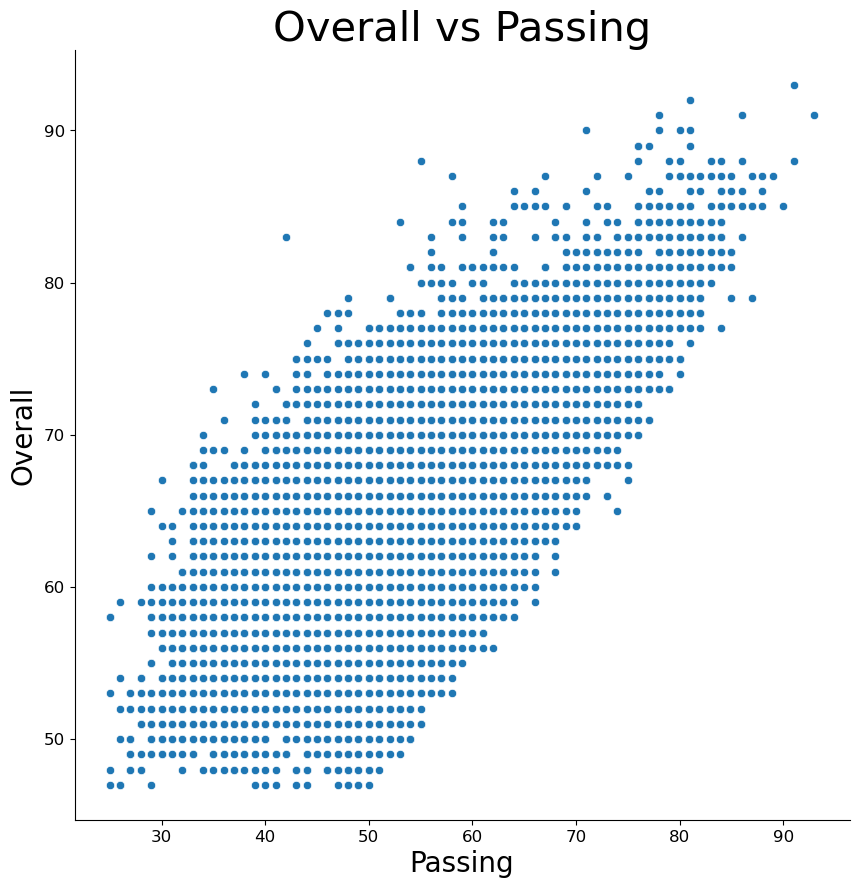

In [28]:
fig = plt.figure(figsize = (10,10))
ax1 = sns.scatterplot(x = 'passing', y = 'overall', data = players_21)

ax1.set_title('Overall vs Passing', fontsize = 30)
ax1.set_xlabel('Passing', fontsize = 20)
ax1.set_ylabel('Overall', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

sns.despine() #removes the lines (at the top and right that make up a box
#around the graph)

## Create a JointGrid
* Set the Theme to 'whitegrid'
* The height argument should be 8
* Scatter Plot showing 'Overall' vs 'Pace' on the joint grid
* Boxplot on the marginal grids, but do not show the outliers
* Leave the rest as default

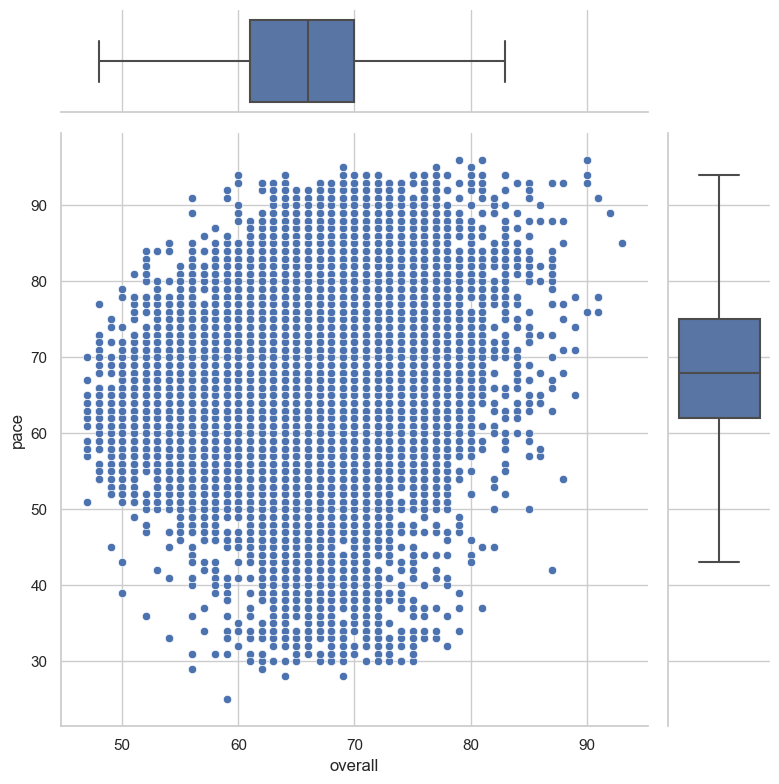

In [38]:
sns.set_theme(style="whitegrid")
g = sns.JointGrid(data = players_21, x = 'overall', y = 'pace', height = 8)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxplot, fliersize = 0)

#g.plot(sns.scatterplot, sns.rugplot)

## Plot a pairplot
* It should show pairwise relationships for 'overall', 'pace' and 'passing'
* Do not show the top right corner
* Use 'preferred_foot' as the hue
* Leave the rest as default

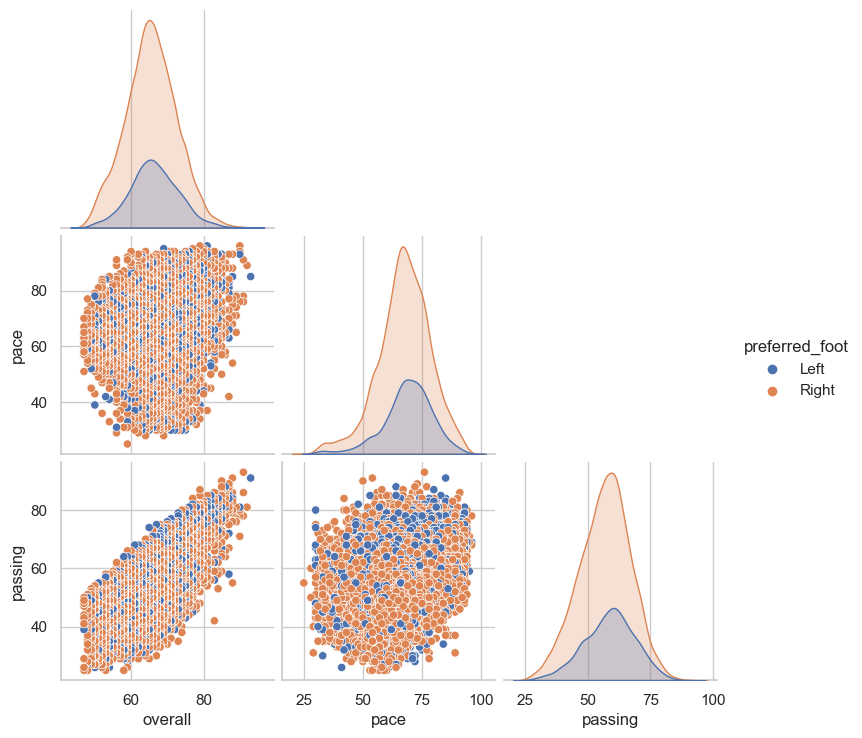

In [45]:
#note: double square brackets, and if you want to ref a column in hue argument, it needs to be plotted first
sns.pairplot(players_21[['overall', 'pace', 'passing','preferred_foot']], corner = True, hue = 'preferred_foot')

## Create a bar chart showing the top 10 leagues with the highest average player 'pace'
* You will be required to do some data preparation and create a new aggregated DataFrame to achieve this
* Give the axes a figuresize of (20,10)
* Title the chart ' Top 10 Leagues by average player pace', fontsize =30
* Give the x and y labels appropriate titles, fontsize 20
* Give the xticks a fontsize of 12 and a vertical rotation
* Use the color map of 'deep'
* Remove the top and left spines of the chart

In [48]:
top_10_pace = players_21[['pace','league_name']].groupby(by='league_name').mean()

top_10_pace.sort_values(by='pace',ascending=False, inplace=True)

top_10_pace.reset_index(inplace=True)

top_10_pace = top_10_pace.head(10)

top_10_pace

,league_name,pace
0,Ukrainian Premier League,74.333333
1,Croatian Prva HNL,73.760000
2,Czech Republic Gambrinus Liga,73.414286
3,Russian Premier League,71.567568
4,Greek Super League,71.090909
5,South African Premier Division,70.791667
6,UAE Arabian Gulf League,70.600000
7,English Premier League,69.418367
8,German 1. Bundesliga,69.113402
9,Holland Eredivisie,68.879902


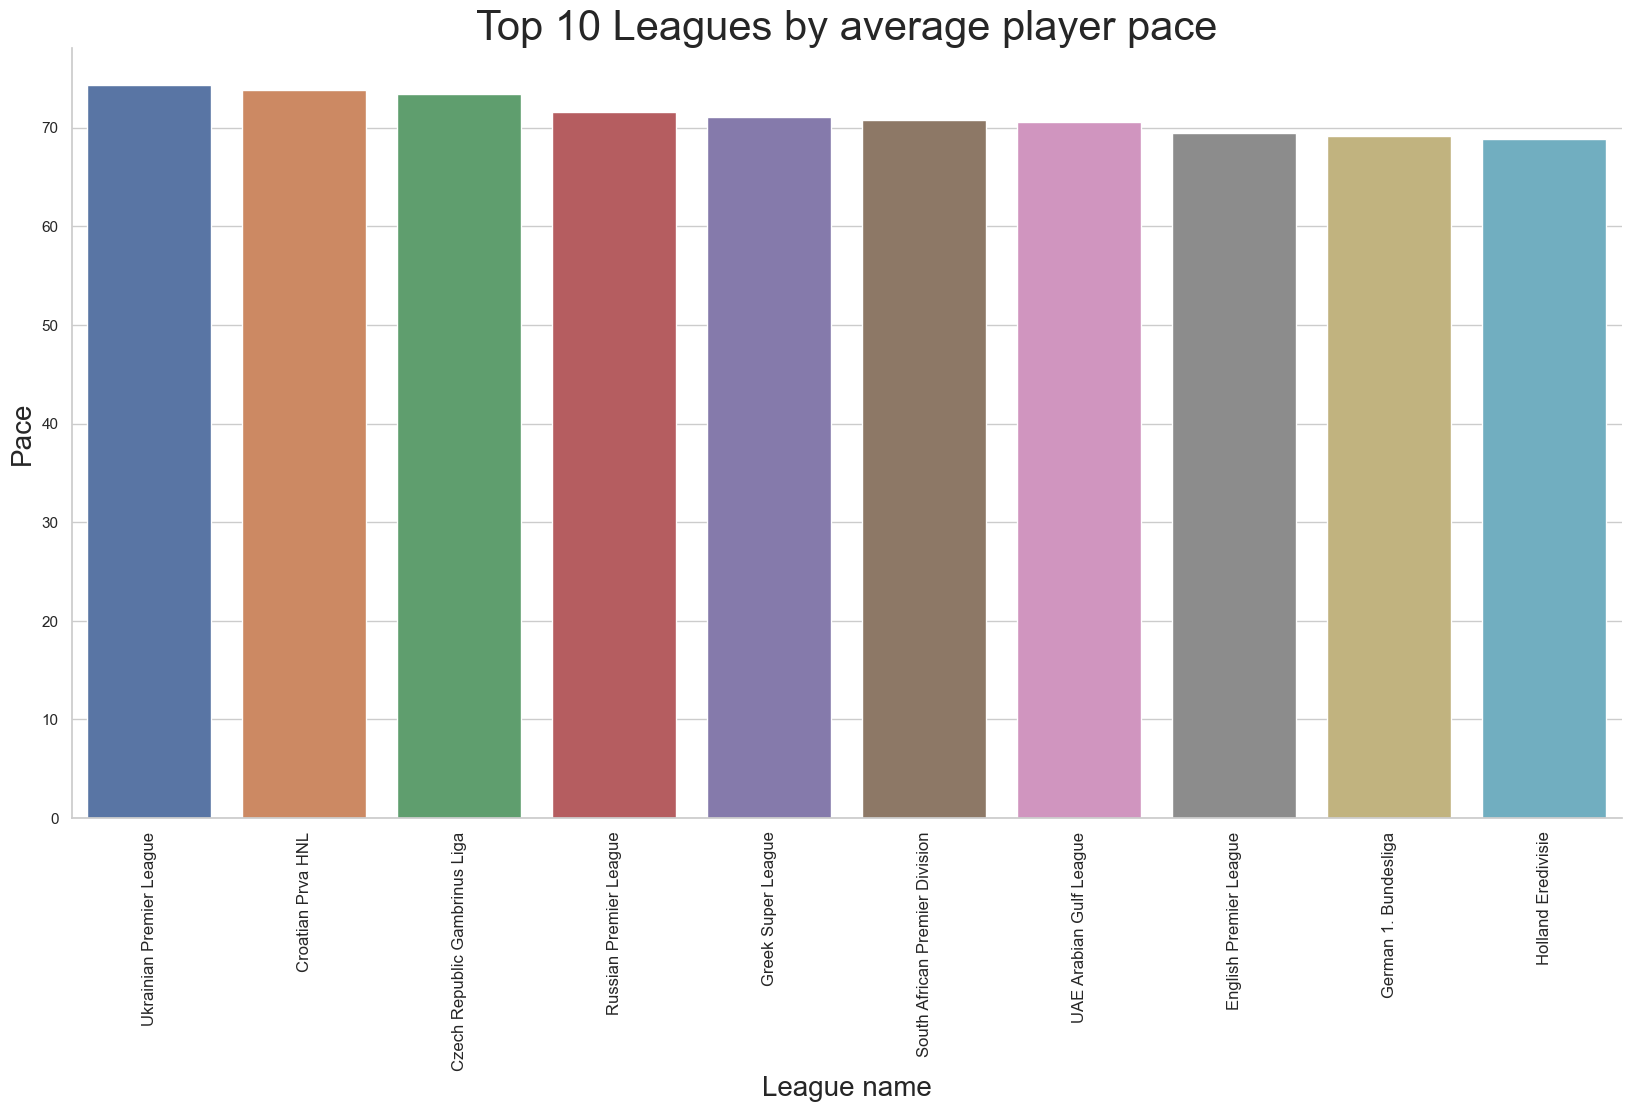

In [53]:
fig = plt.figure(figsize = (20,10))

ax1 = sns.barplot(x = 'league_name', y = 'pace', data = top_10_pace, palette = 'deep')

ax1.set_title('Top 10 Leagues by average player pace', fontsize = 30)
ax1.set_xlabel('League name', fontsize = 20)
ax1.set_ylabel('Pace', fontsize = 20)
plt.xticks(rotation = 'vertical', fontsize = 12)
sns.despine()

## Create a new column titled 'overall_class' on the players_21 DataFrame
* If the player is 85 or over classify them as 'Excellent'
* If the player is greater than or equal to 80 but less than 85 classify them as 'Very Good'
* If the player is greater than or equal to 75 but less than 80 classify them as 'Good'
* If the player is over 60 but less than 75 then classify them as 'Fair'
* Otherwise class them as 'Below Average'

## Create a catplot
* We have not discussed catplots, but they work similarly to displots, relplots and other Facet Grids. https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
* The chart kind should be a boxplot and it should analyse the 'pace' column
* It should be faceted by the newly created 'overall_class' column
* You can format the plot however you wish

In [54]:
def my_func(x):
    if x >=85:
        return 'Excellent'
    elif x >=80:
        return 'Very Good'
    elif x >=75:
        return 'Good'    
    elif x >=60:
        return 'Good'
    else:
        return 'Below Average'

In [55]:
players_21['overall_class'] = players_21['overall'].apply(my_func)

In [56]:
players_21

,short_name,overall,pace,dribbling,passing,preferred_foot,league_name,overall_class
0,L. Messi,93,85.0,95.0,91.0,Left,Spain Primera Division,Excellent
1,Cristiano Ronaldo,92,89.0,89.0,81.0,Right,Italian Serie A,Excellent
2,J. Oblak,91,NaN,NaN,NaN,Right,Spain Primera Division,Excellent
3,R. Lewandowski,91,78.0,85.0,78.0,Right,German 1. Bundesliga,Excellent
4,Neymar Jr,91,91.0,94.0,86.0,Right,French Ligue 1,Excellent
...,...,...,...,...,...,...,...,...
18939,K. Angulo,47,63.0,47.0,50.0,Right,Colombian Liga Postobón,Below Average
18940,Zhang Mengxuan,47,58.0,27.0,26.0,Right,Chinese Super League,Below Average
18941,Wang Zhenghao,47,51.0,36.0,29.0,Right,Chinese Super League,Below Average
18942,Chen Zitong,47,61.0,48.0,48.0,Right,Chinese Super League,Below Average


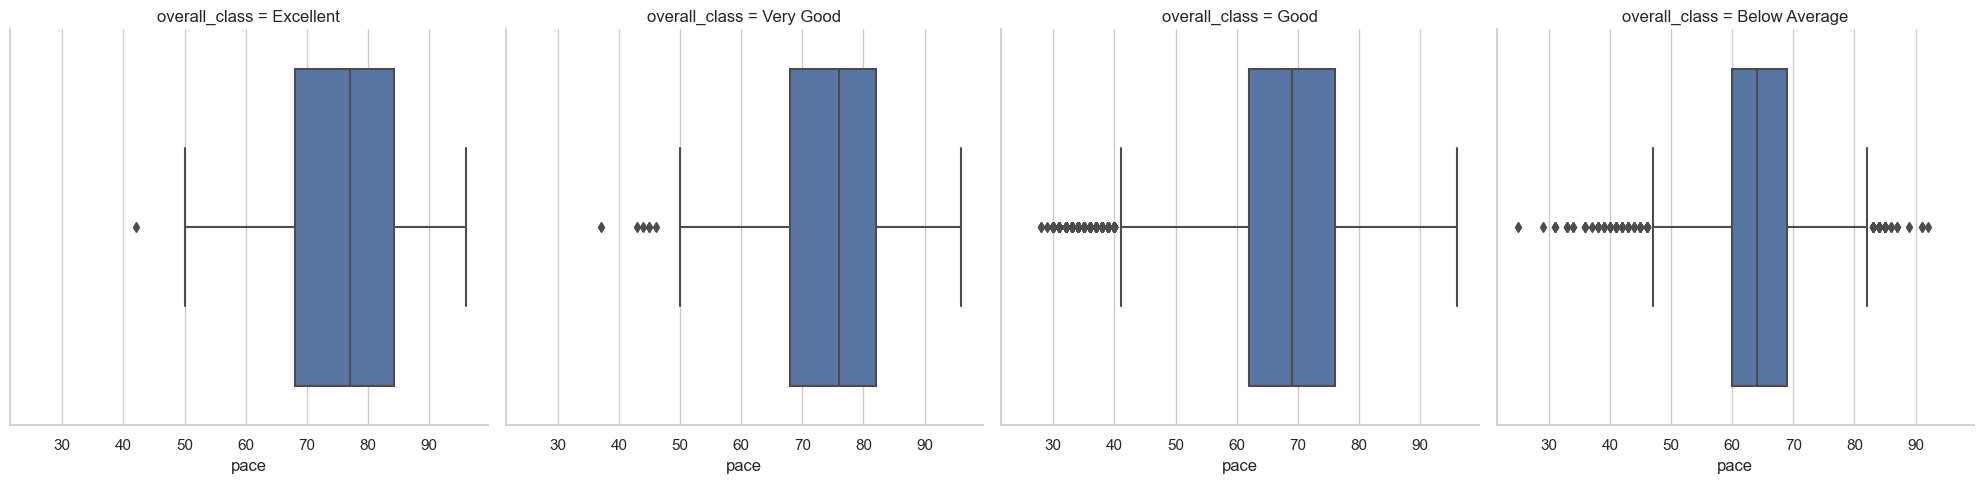

In [57]:
sns.catplot(data = players_21, x = 'pace', kind = 'box', col = 'overall_class')